In [44]:
import os; os.chdir("..")
import sys; sys.path.append("../../Path_Scripts")
import numpy as np
import matplotlib.pyplot as plt
from rlutils.rewards.pbrl.graph import PreferenceGraph
from rlutils.rewards.pbrl.models import maximum_likelihood_fitness

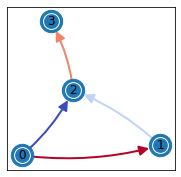

In [59]:
graph = PreferenceGraph()
for _ in range(4): graph.add_episode(None, None, None)
graph.add_preference(None, 0, 1, 0.2)
graph.add_preference(None, 0, 2, 0.7)
graph.add_preference(None, 1, 2, 0.5)
graph.add_preference(None, 2, 3, 0.3)
graph.show((3,3));

In [60]:
_, _, _, A, _, _, y = graph.make_data_structures()
f_th = np.array([maximum_likelihood_fitness(A, y, "thurstone")[0] for _ in range(100)])
f_bt = np.array([maximum_likelihood_fitness(A, y, "bradley-terry")[0] for _ in range(100)]);

[-1.7253804  -0.36875373 -2.0496686  -0.04603978] [0.12983249 0.23371759 0.08366455 0.1685519 ]
[-1.7015308  -0.39977977 -2.0639088  -0.01728306] [0.14962704 0.2523328  0.08398088 0.08530913]


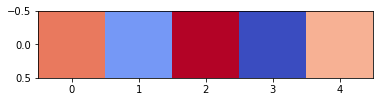

In [76]:
print(f_th.mean(axis=0), f_th.std(axis=0))

mean = f_bt.mean(axis=0)
print(mean, f_bt.std(axis=0))

im = np.hstack((mean.reshape(1,-1), [[0.4*mean[0] + 0.3*mean[1] + 0.3*mean[2]]]))

plt.imshow(im, cmap="coolwarm_r");